In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Salary.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Native-country,Salary-class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education-num      int64
Marital-status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-gain       int64
Capital-loss       int64
Hpw                int64
Native-country    object
Salary-class      object
dtype: object

In [4]:
df.describe()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hpw
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.shape

(32561, 15)

In [6]:
# Checking for missing values

df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hpw               0
Native-country    0
Salary-class      0
dtype: int64

In [7]:
# Replacing ? with appropriate data

for m in df[["Workclass","Education","Marital-status",'Occupation','Relationship','Race','Sex','Native-country','Salary-class']]:
    df[m] = df[m].replace(['?'],df[m].mode()) 

In [8]:
for m in df[['Age','Fnlwgt','Education-num','Capital-gain','Capital-loss','Hpw']]:
    df[m] = df[m].replace(['?'],df[m].median()) 

In [9]:
# Converting categorical to numerical data
# using label encoder for the entire dataframe

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 

df[["Workclass","Education","Marital-status",'Occupation','Relationship','Race','Sex','Native-country','Salary-class']] = df[["Workclass","Education","Marital-status",'Occupation','Relationship','Race','Sex','Native-country','Salary-class']].apply(label_encoder.fit_transform)
df.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Native-country,Salary-class
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [10]:
#Correlation

df.corr()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Native-country,Salary-class
Age,1.000000,0.003787,-0.076646,-0.010508,0.036527,-0.266288,-0.020947,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234037
Workclass,0.003787,1.000000,-0.016656,0.023513,0.052085,-0.064731,0.254892,-0.090461,0.049742,0.095981,0.033835,0.012216,0.138962,-0.007690,0.051604
Fnlwgt,-0.076646,-0.016656,1.000000,-0.028145,-0.043195,0.028153,0.001597,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.051966,-0.009463
Education,-0.010508,0.023513,-0.028145,1.000000,0.359153,-0.038407,-0.021260,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.064288,0.079317
Education-num,0.036527,0.052085,-0.043195,0.359153,1.000000,-0.069304,0.109697,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.050840,0.335154
Marital-status,-0.266288,-0.064731,0.028153,-0.038407,-0.069304,1.000000,-0.009654,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.023819,-0.199307
Occupation,-0.020947,0.254892,0.001597,-0.021260,0.109697,-0.009654,1.000000,-0.075607,0.006763,0.080296,0.025505,0.017987,0.080383,-0.012543,0.075468
Relationship,-0.263698,-0.090461,0.008931,-0.010876,-0.094153,0.185451,-0.075607,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.005507,-0.250918
Race,0.028718,0.049742,-0.021291,0.014131,0.031838,-0.068013,0.006763,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.137852,0.071846
Sex,0.088832,0.095981,0.026858,-0.027356,0.012280,-0.129314,0.080296,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,-0.008119,0.215980


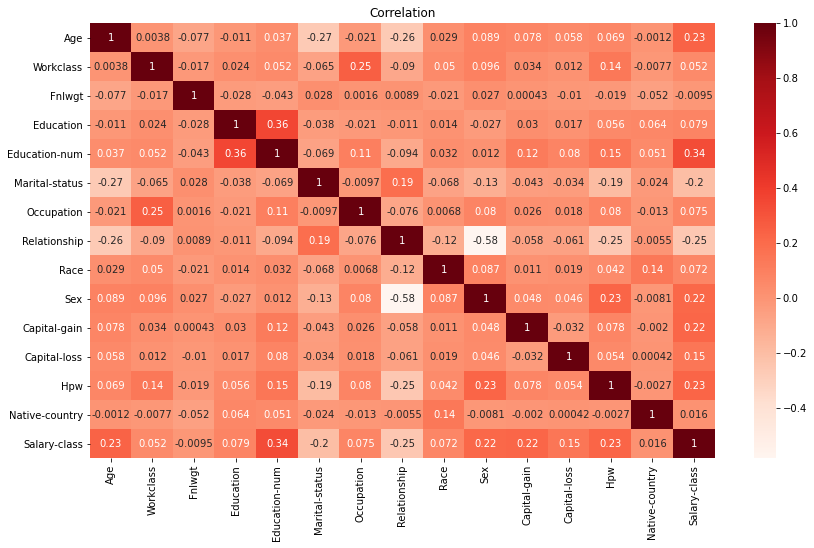

In [11]:
# Visualizing correlation using heatmap

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
plt.title("Correlation")
sns.heatmap(df.corr(),annot=True,cmap='Reds')

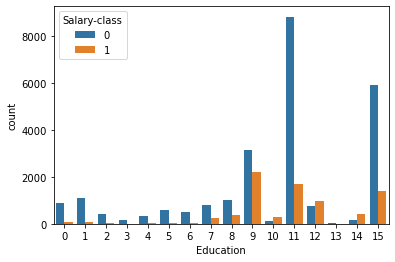

In [12]:
sns.countplot(df["Education"],hue = df["Salary-class"],orient = 'v')

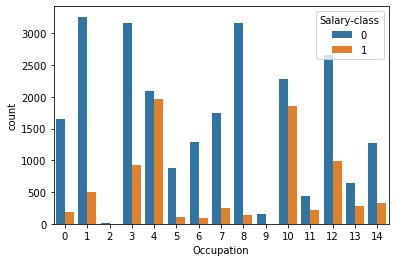

In [13]:
sns.countplot(df["Occupation"],hue = df["Salary-class"],orient = 'v')

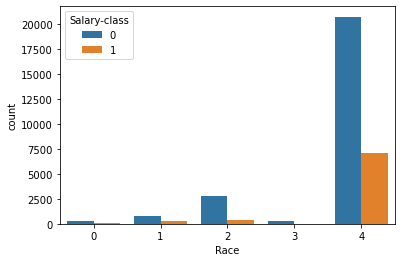

In [14]:
sns.countplot(df["Race"],hue = df["Salary-class"],orient = 'v')

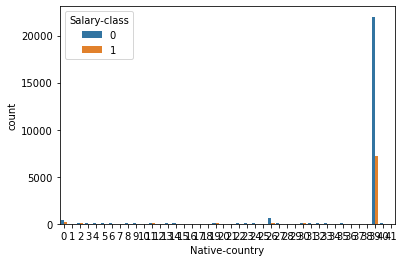

In [15]:
sns.countplot(df["Native-country"],hue = df["Salary-class"],orient = 'v')

In [16]:
# Drooping weakly -ve correlaed columns with the target

df.drop('Fnlwgt',axis=1,inplace=True)
df.head()

,Age,Workclass,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Native-country,Salary-class
0,39,7,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,9,13,2,10,5,2,0,0,0,40,5,0


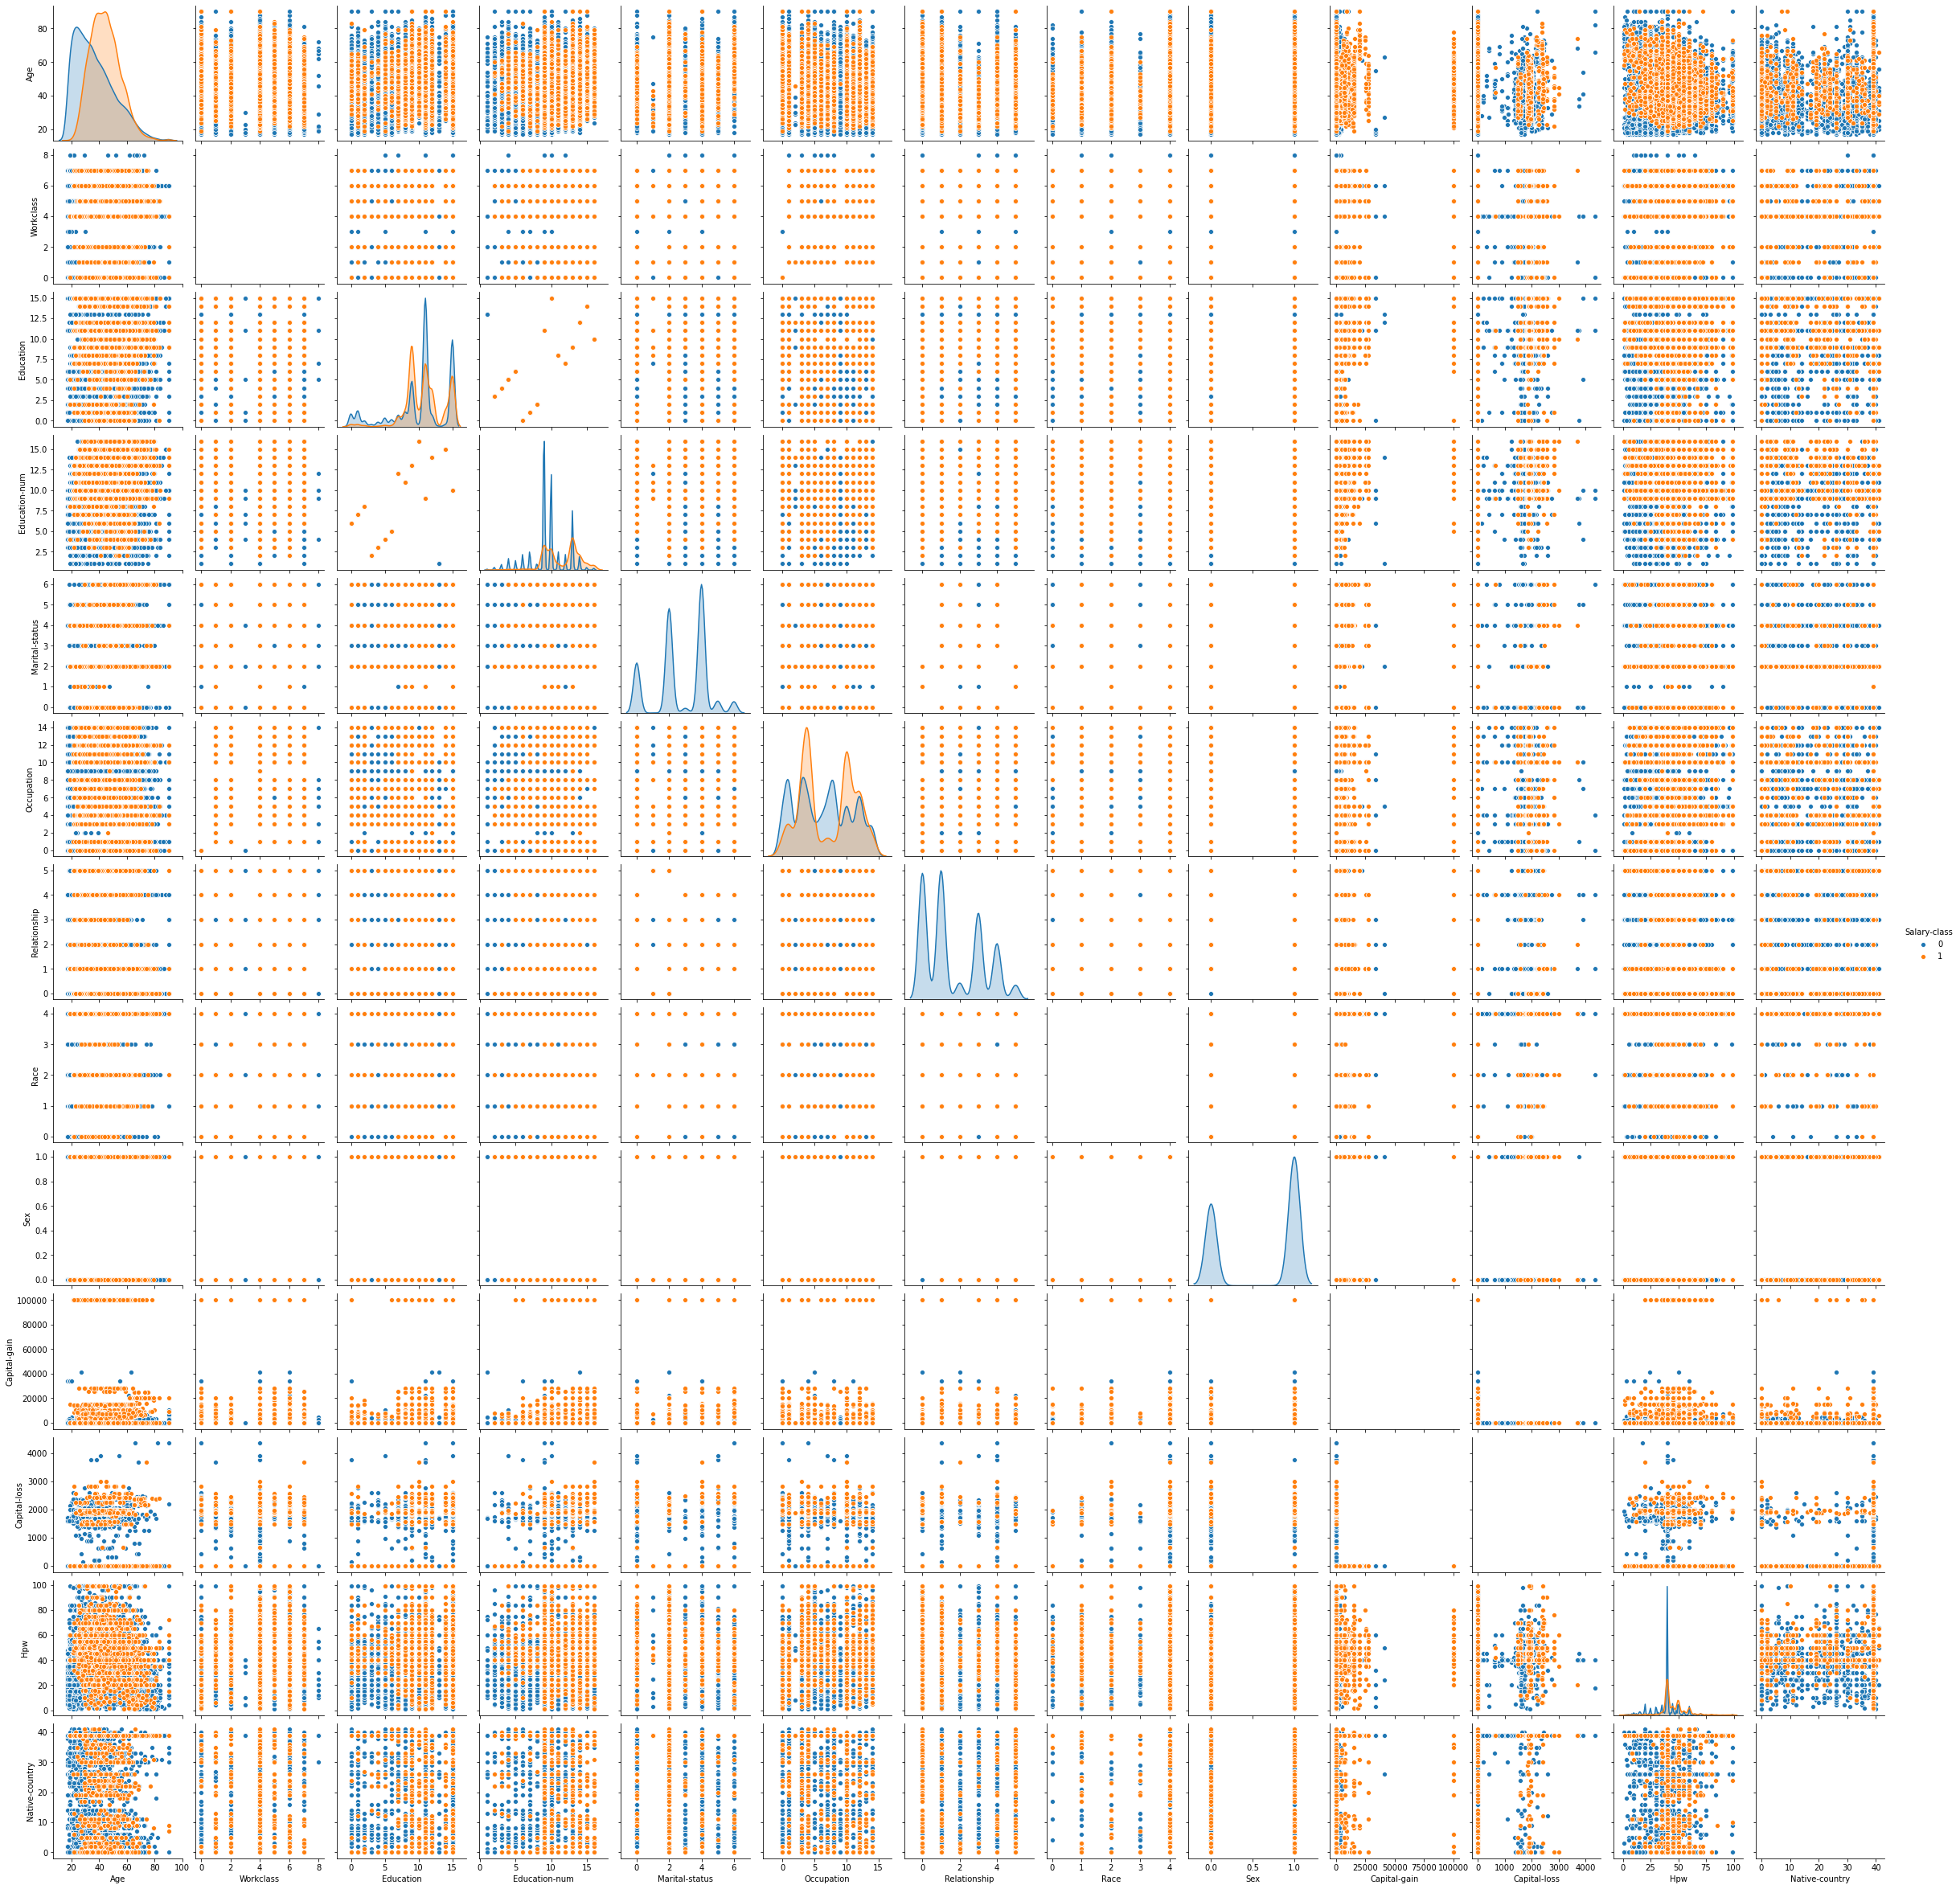

In [17]:
sns.pairplot(df,hue="Salary-class")

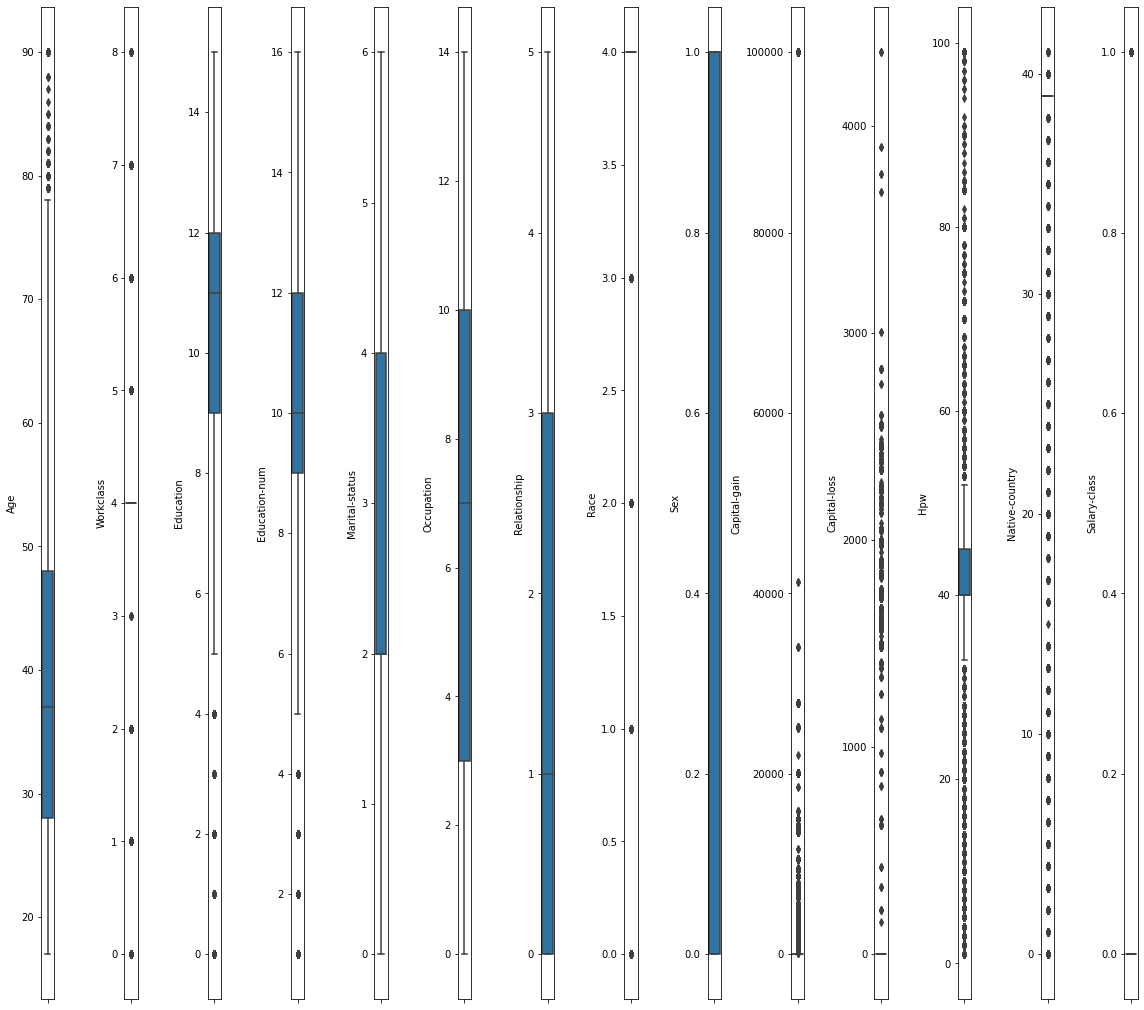

In [18]:
# Checking for outliers using boxplot

collist = df.columns.values
ncol = 14
nrows = 5

plt.figure(figsize=(16,5*ncol))
for i in range(len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],orient = "v")
    plt.tight_layout()
    

In [19]:
# Removing outliers

from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
df_new.head()

,Age,Workclass,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Native-country,Salary-class
0,39,7,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,1,7,2,6,0,2,1,0,0,40,39,0
5,37,4,12,14,2,4,5,4,0,0,0,40,39,0


In [20]:
df.shape

(32561, 14)

In [21]:
df_new.shape

(27722, 14)

In [22]:
df = df_new

In [23]:
# PCA



In [24]:
# Skewness

df.skew()

Age                0.486462
Workclass         -0.738278
Education         -0.956859
Education-num     -0.145932
Marital-status    -0.046042
Occupation         0.132931
Relationship       0.748943
Race              -2.557152
Sex               -0.684821
Capital-gain       4.931696
Capital-loss      29.488944
Hpw               -0.358958
Native-country    -5.398783
Salary-class       1.324739
dtype: float64

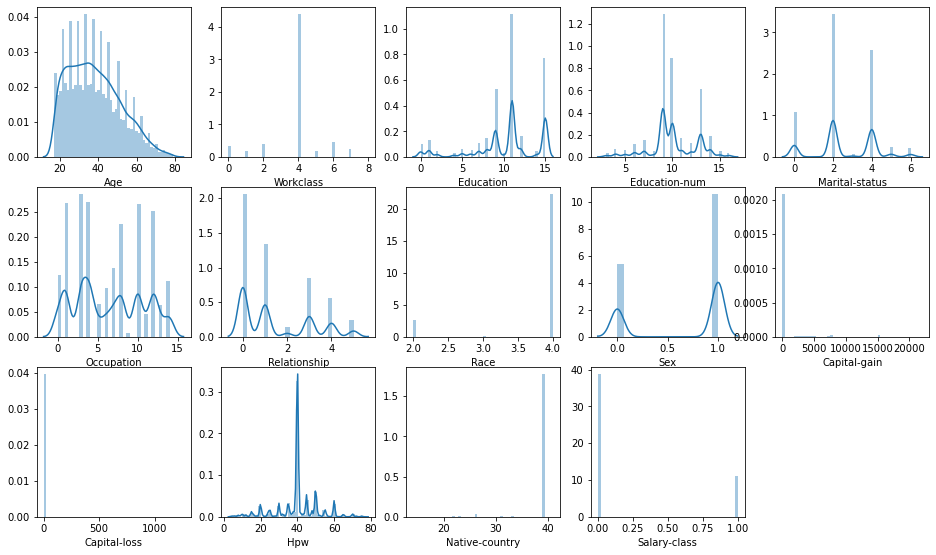

In [25]:
# Visualizing skewness

collist = df.columns.values
ncol = 5
nrow= 5

plt.figure(figsize = (16,16))
plt.title("Skewness")
for i in range(len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(df[collist[i]])

In [26]:
for col in df[['Capital-loss','Capital-gain']]:
    df[col]=np.log1p(df[col])

In [27]:
df.head()

,Age,Workclass,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Native-country,Salary-class
0,39,7,9,13,4,1,1,4,1,7.684784,0.0,40,39,0
1,50,6,9,13,2,4,0,4,1,0.000000,0.0,13,39,0
2,38,4,11,9,0,6,1,4,1,0.000000,0.0,40,39,0
3,53,4,1,7,2,6,0,2,1,0.000000,0.0,40,39,0
5,37,4,12,14,2,4,5,4,0,0.000000,0.0,40,39,0


In [28]:
# Splitting independent variables and target

x = df.drop('Salary-class',axis=1)
print(x.head())
y = df[['Salary-class']]
print("\n")
print(y.head())

   Age  Workclass  Education  Education-num  Marital-status  Occupation  \
0   39          7          9             13               4           1   
1   50          6          9             13               2           4   
2   38          4         11              9               0           6   
3   53          4          1              7               2           6   
5   37          4         12             14               2           4   

   Relationship  Race  Sex  Capital-gain  Capital-loss  Hpw  Native-country  
0             1     4    1      7.684784           0.0   40              39  
1             0     4    1      0.000000           0.0   13              39  
2             1     4    1      0.000000           0.0   40              39  
3             0     2    1      0.000000           0.0   40              39  
5             5     4    0      0.000000           0.0   40              39  


   Salary-class
0             0
1             0
2             0
3             0

In [29]:
# Using Standard scaler for uniform range in all columns

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.065430,2.167085,-0.343974,1.222595,0.912069,-1.305125,-0.293507,0.347769,0.714600,2.956897,-0.040193,0.008623,0.195761
1,0.886146,1.475977,-0.343974,1.222595,-0.403660,-0.598508,-0.915856,0.347769,0.714600,-0.295904,-0.040193,-2.414249,0.195761
2,-0.009180,0.093761,0.171202,-0.436640,-1.719389,-0.127430,-0.293507,0.347769,0.714600,-0.295904,-0.040193,0.008623,0.195761
3,1.109977,0.093761,-2.404677,-1.266258,-0.403660,-0.127430,-0.915856,-2.928643,0.714600,-0.295904,-0.040193,0.008623,0.195761
4,-0.083791,0.093761,0.428790,1.637404,-0.403660,-0.598508,2.195890,0.347769,-1.399384,-0.295904,-0.040193,0.008623,0.195761


In [30]:
# Splitting into training and testing data

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [33]:
model = [LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier()]

for m in model:
    m.fit(x_train,y_train)
    print(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("accuracy score of", m,"is")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("\n")

0.8245479550886053
accuracy score of LogisticRegression() is
0.8218214607754734
[[4045  245]
 [ 743  512]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4290
           1       0.68      0.41      0.51      1255

    accuracy                           0.82      5545
   macro avg       0.76      0.68      0.70      5545
weighted avg       0.81      0.82      0.80      5545



0.7660639401181404
accuracy score of GaussianNB() is
0.7599639314697926
[[3248 1042]
 [ 289  966]]
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      4290
           1       0.48      0.77      0.59      1255

    accuracy                           0.76      5545
   macro avg       0.70      0.76      0.71      5545
weighted avg       0.82      0.76      0.78      5545



0.8535870496460297
accuracy score of SVC() is
0.8477908025247971
[[4073  217]
 [ 627  628]]
              precision    recall  f1-score 

In [34]:
# Ensemble techniques

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf= rf.predict(x_test)
print("accuracy score",accuracy_score(y_test,predrf))
print("confusion matrix",confusion_matrix(y_test,predrf))
print("classification_report \n",classification_report(y_test,predrf))

accuracy score 0.8468890892696123
confusion matrix [[3977  313]
 [ 536  719]]
classification_report 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      4290
           1       0.70      0.57      0.63      1255

    accuracy                           0.85      5545
   macro avg       0.79      0.75      0.77      5545
weighted avg       0.84      0.85      0.84      5545



In [36]:
#cross_val_score

from sklearn.model_selection import cross_val_score

model = [LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),rf]

for m in model:
    print("For",m ,cross_val_score(m,x,y,cv=10).mean())

For LogisticRegression() 0.8232814857138694
For GaussianNB() 0.7621383715054829
For SVC() 0.8491454522558021
For DecisionTreeClassifier() 0.8099706169936967
For KNeighborsClassifier() 0.8300630851297998
For RandomForestClassifier() 0.8445281078259802


In [37]:
# Saving the model -svc

import joblib

joblib.dump(SVC(),"svc_salary.pkl")

['svc_salary.pkl']